# Image Analysis for Zalanda Fashion - MNIST Dataset


**Table of contents**<a id='toc0_'></a>    
- [Loading Libraries & Data](#toc1_1_)    
- [Logistic Regression Model](#toc2_)    
- [CNN Model](#toc3_)    
- [Conclusion](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


TL;DR

- Each row is a separate image
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255)

Acknowledgements

- Data was downloaded from https://www.kaggle.com/datasets/zalando-research/fashionmnist

- Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

- Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

## <a id='toc1_1_'></a>[Loading Libraries & Data](#toc0_)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from scipy.misc import face

grayscale_raccoon = face(gray=True)
color_raccoon = face()

/var/folders/0y/k2wtvzs527g8z6726scfz6_80000gn/T/ipykernel_3234/606854657.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  grayscale_raccoon = face(gray=True)
/var/folders/0y/k2wtvzs527g8z6726scfz6_80000gn/T/ipykernel_3234/606854657.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  color_raccoon = face()


In [3]:
#data 
train_set= pd.read_csv('./archive/fashion-mnist_train.csv')
test_set= pd.read_csv('./archive/fashion-mnist_test.csv')

In [4]:
#training data
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#test data
test_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# modify the X values to be 0-1 instead of 0-255
train_data = np.array(train_set, dtype= 'float32')
test_data= np.array(test_set, dtype= 'float32')
X_train= train_data[:, 1:]/255
X_test= test_data[:, 1:]/255
y_train= train_data[:, 0]
y_test= test_data[:, 0]

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X_train, y_train, train_size=0.7, random_state=999)

Let's plot a sample of data to understand the products in the dataset

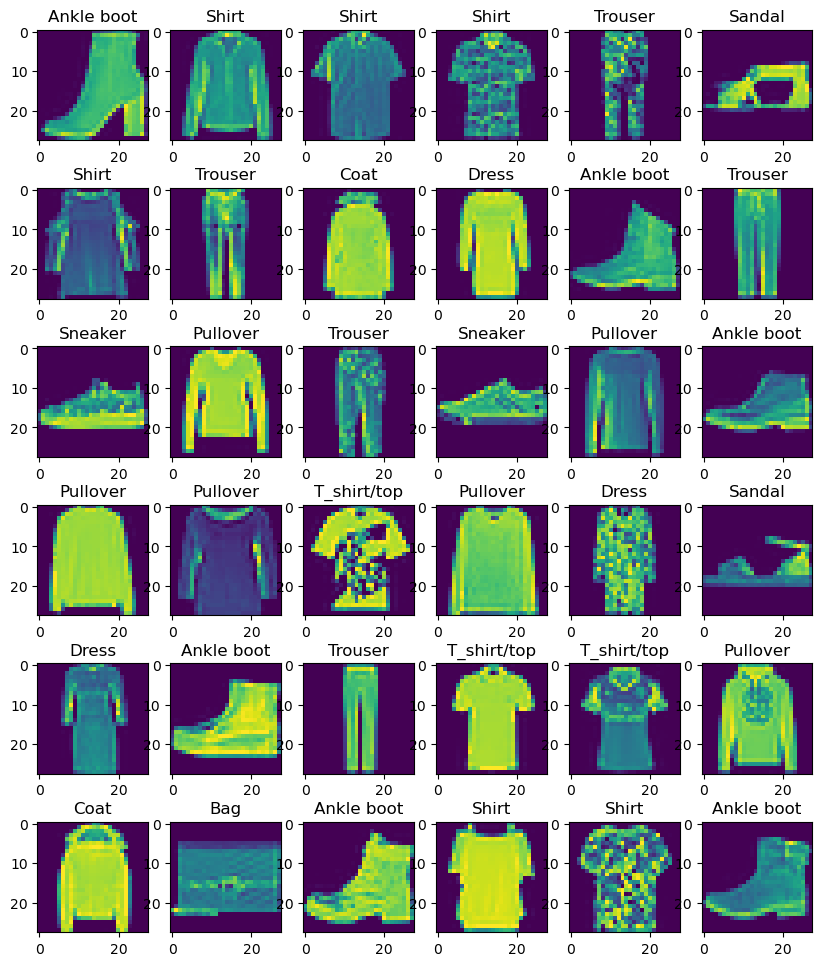

In [17]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(X_train[i].reshape(28,28))
    name_index= int(y_train[i])
    plt.title(class_names[name_index])
    
plt.show()

# <a id='toc2_'></a>[Logistic Regression Model](#toc0_)

1st let's train a logistic regression model and evaluate the model results 

In [18]:
from sklearn.linear_model import LogisticRegression

#train the model
my_logit = LogisticRegression(solver='saga', penalty='l1', C=10.0, max_iter=20, random_state=42)
my_logit.fit(X_train, y_train)

/Users/anupajayakody/anaconda3/envs/deeplearning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10.0, max_iter=20, penalty='l1', random_state=42,
                   solver='saga')

In [19]:
#checking accuracy
print('train accuracy :', my_logit.score(X_train, y_train))
print('test accuracy :', my_logit.score(X_test, y_test))

train accuracy : 0.8755714285714286
test accuracy : 0.8548888888888889


It can be seen that the model has dropped in performance in the test data set

Let's plot the confusion matrix to get a better idea of the results

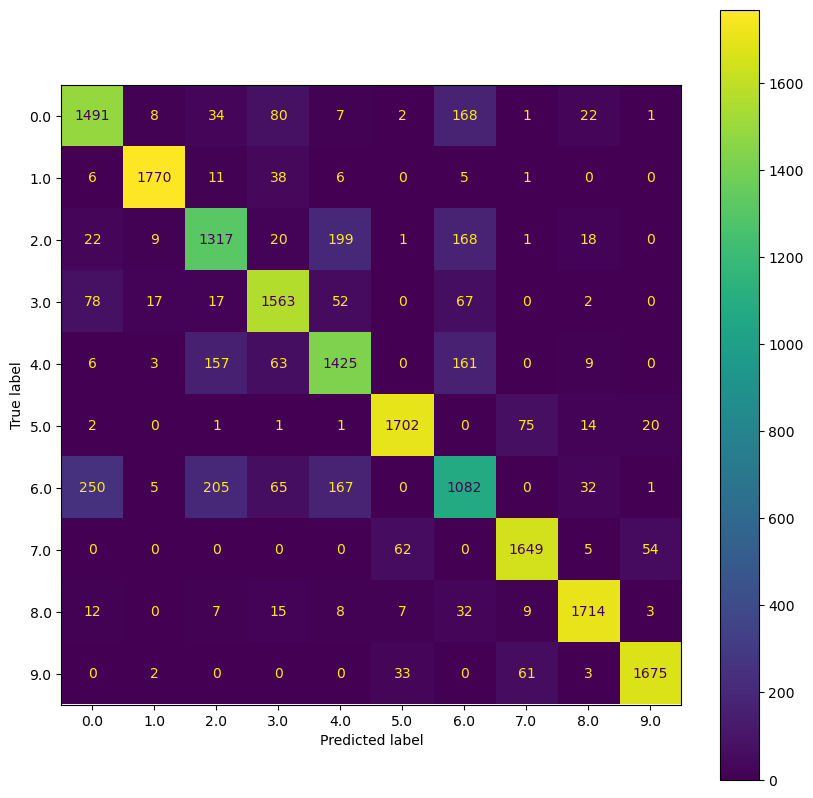

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = my_logit.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))

# create the display with appropriate labels
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=my_logit.classes_,
)

disp.plot(ax=plt.gca()) # place plot on current matplotlib axis
plt.show()

Refresher on the data labels, 

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

With 0 & 6 predictions being high, we can see why it is possible that they are tshirts, and shirts and there is a high chance that they could be predicted wrong
Another example is 2 & 6, pullover and shirt, with these items looking similar, they could be predicted wrong

Let's visualize the co-efficients

In [34]:
coefficients = my_logit.coef_

coefficients.shape

(10, 784)

In the coefficient array, axis-0 corresponds to the 10 separate classifiers that aim to distinguish each class for the rest in the 1-vs-all scheme. Let's reshape the second dimension so that it corresponds to the 28x28 pixel positions.

In [35]:
coefficients = coefficients.reshape(-1, 28, 28)

coefficients.shape

(10, 28, 28)

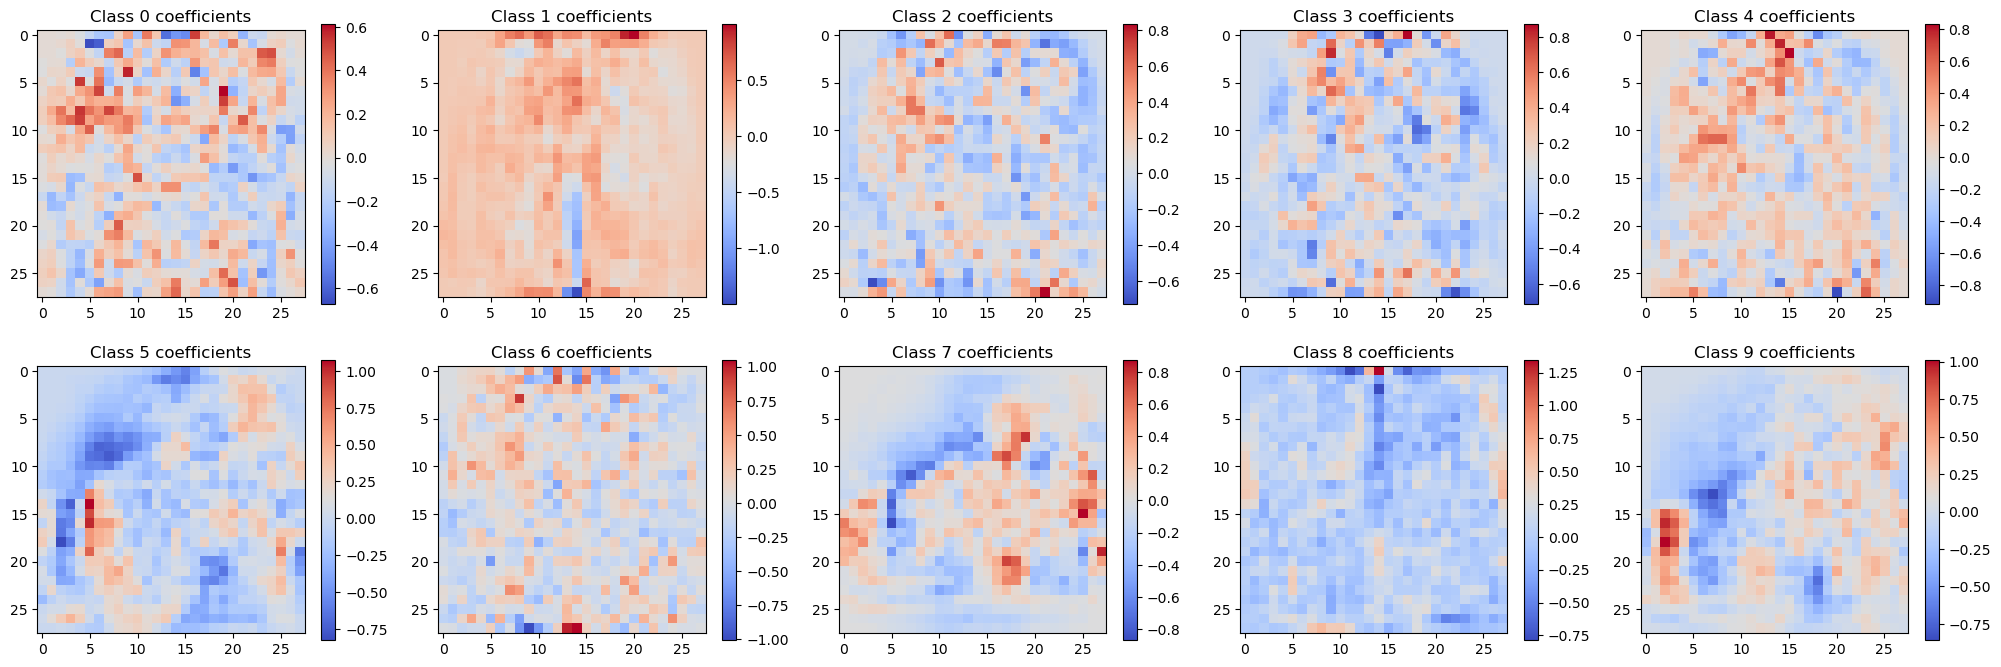

In [36]:
fig, axs = plt.subplots(2, 5, figsize=(25, 8))

for i, ax in enumerate(axs.ravel()):
    im = ax.imshow(coefficients[i, :, :], cmap='coolwarm')
    ax.set_title(f"Class {i} coefficients")
    plt.colorbar(im, ax=ax)
plt.show()

In [37]:
importance = np.mean(np.abs(my_logit.coef_), axis=0)
importance = importance/importance.max()

importance.shape

(784,)

Now let's reshape it

In [38]:
importance_image = importance.reshape(28, 28)

Let's plot the result.

Important pixels would be brighter (values closer to 1), while insignificant pixels would be darker (closer to 0)

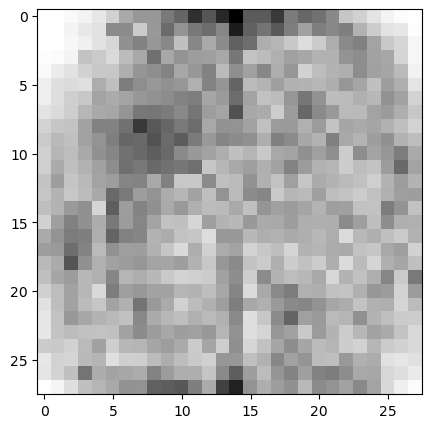

In [26]:
plt.figure(figsize=(5, 5))
plt.imshow(importance_image, cmap='gray_r')
plt.show()

# <a id='toc3_'></a>[CNN Model](#toc0_)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [39]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train)}')

num_classes = len(np.unique(y_train))
print(f'number of classes: {num_classes}')

X range: 0.0-1.0
y values: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
number of classes: 10


In [40]:
# define input image dimensions
img_rows, img_cols = 28, 28

# reshape for Keras model types
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)

X_test= X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (42000, 28, 28, 1)
X_test shape: (18000, 28, 28, 1)


In [41]:
CNN_model = Sequential()

# simple CNN model architecture with Pooling for dimensionality reduction 
# and Dropout to reduce overfitting
CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (28, 28, 1)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

# flatten the output of our convolutional layers
CNN_model.add(Flatten())

# add dense layers
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(num_classes, activation='softmax'))

# print the model summary
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# he model with the desired loss function, optimizer, and metrics to track
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [45]:
# fit the model on the training data, defining desired batch_size & number of epochs,
# running validation after each batch

CNN_model.fit(X_train, y_train,
              batch_size = 128,
              epochs = 10,
              verbose = 1,
              validation_split = 0.2)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6195 - loss: 1.0315 - val_accuracy: 0.8330 - val_loss: 0.4857
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8240 - loss: 0.4746 - val_accuracy: 0.8593 - val_loss: 0.4148
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8495 - loss: 0.4122 - val_accuracy: 0.8746 - val_loss: 0.3521
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8669 - loss: 0.3666 - val_accuracy: 0.8673 - val_loss: 0.3548
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8697 - loss: 0.3536 - val_accuracy: 0.8888 - val_loss: 0.3112
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8821 - loss: 0.3209 - val_accuracy: 0.8849 - val_loss: 0.3147
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8895 - loss: 0.2985 - val_accuracy: 0.8999 - val_loss: 0.2836
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8922 - loss: 0.2880 - val_accu

In [46]:
# evaluate the model's performance on the test data
score = CNN_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9027 - loss: 0.2717
Test loss: 0.2770155072212219
Test accuracy: 0.9013888835906982


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


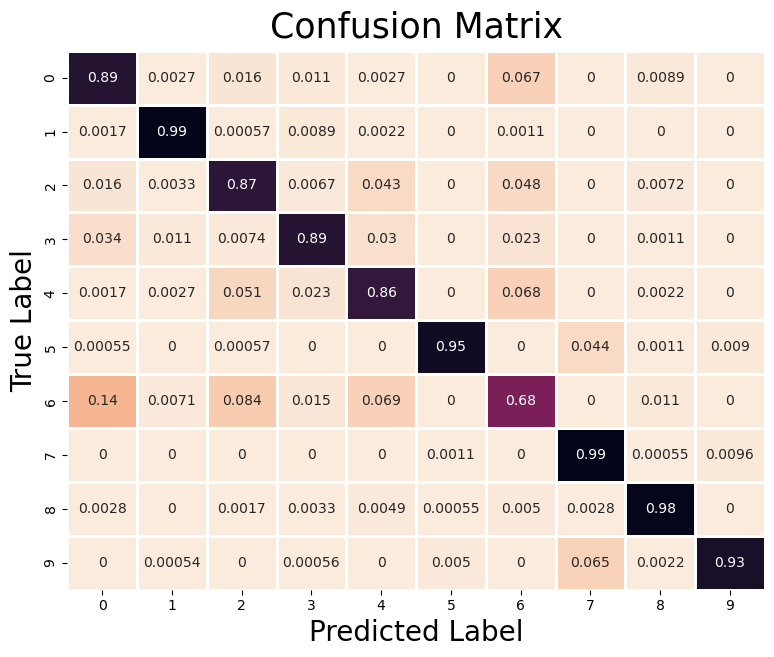

In [48]:
from sklearn.metrics import confusion_matrix

# predicted labels for each test image.
predict_probas = CNN_model.predict(X_test)
y_predict = np.argmax(predict_probas, axis=1)

# confusion matrix using sklearn 
conf_mat = confusion_matrix(y_test, y_predict)

# since we have many images, it is helpful to show our 
# results as fractions of the total number of images 
# for each class.
normalized_conf_mat = conf_mat / conf_mat.sum(axis=1)

plt.figure(figsize = (9,7))
sns.heatmap(normalized_conf_mat,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

# <a id='toc4_'></a>[Conclusion](#toc0_)

In this exercise, I attempted to compare the 2 models, Logistic Regression and CNN for an image classification on a dataset from the retailer Zalando. CNN model produced a higher accuracy of ~90% as opposed to ~85% in Logistic Regression. Hence the CNN model performance is better in this case. 

On the cases where predictions were wrong, it can be understood that the similar looking products such as the t-shirts and shirts, t-shirts and pullovers were interchangeably predicted wrong. 